In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('Dataset.xlsx')
df

,direction,route,volume,vehicle_type,price_client,counter_price,type_upload,date
0,Москва - Архангельск,Чагода-Архангельск,82,1,79000.0,NaN,Задняя,2024-09-12
1,Москва - Архангельск,Истра-Архангельск,82,1,104000.0,150000.0,Задняя,2024-09-12
2,Москва - Архангельск,Красногорск-Архангельск,82,1,NaN,95000.0,Задняя,2024-09-12
3,Москва - Архангельск,Некрасовский-Архангельск,82,1,73000.0,73000.0,Верхняя,2024-09-12
4,Москва - Архангельск,Дмитров-Архангельск,82,1,66000.0,66000.0,Верхняя,2024-09-12
...,...,...,...,...,...,...,...,...
1777,Ярославль-Москва,Ярославль-Лешино,82,2,25000.0,NaN,Задняя,2024-12-13
1778,Ярославль-Москва,Ярославль-Лешино,82,2,23000.0,NaN,Задняя,2024-12-13
1779,Ярославль-Москва,Ярославль-Чехов,82,2,25000.0,25000.0,Задняя,2024-12-13
1780,Ярославль-Москва,Ярославль-Подольск,86,2,20000.0,NaN,Задняя,2024-12-13


In [3]:
df['direction'] = df['direction'] + ' ' + df['vehicle_type'].astype(str) + ' ' + df['type_upload'] + ' ' + df['volume'].astype(str)
df = df.drop(columns=['vehicle_type', 'type_upload', 'volume'])
df

,direction,route,price_client,counter_price,date
0,Москва - Архангельск 1 Задняя 82,Чагода-Архангельск,79000.0,NaN,2024-09-12
1,Москва - Архангельск 1 Задняя 82,Истра-Архангельск,104000.0,150000.0,2024-09-12
2,Москва - Архангельск 1 Задняя 82,Красногорск-Архангельск,NaN,95000.0,2024-09-12
3,Москва - Архангельск 1 Верхняя 82,Некрасовский-Архангельск,73000.0,73000.0,2024-09-12
4,Москва - Архангельск 1 Верхняя 82,Дмитров-Архангельск,66000.0,66000.0,2024-09-12
...,...,...,...,...,...
1777,Ярославль-Москва 2 Задняя 82,Ярославль-Лешино,25000.0,NaN,2024-12-13
1778,Ярославль-Москва 2 Задняя 82,Ярославль-Лешино,23000.0,NaN,2024-12-13
1779,Ярославль-Москва 2 Задняя 82,Ярославль-Чехов,25000.0,25000.0,2024-12-13
1780,Ярославль-Москва 2 Задняя 86,Ярославль-Подольск,20000.0,NaN,2024-12-13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   direction      1782 non-null   object        
 1   route          1782 non-null   object        
 2   price_client   1674 non-null   float64       
 3   counter_price  555 non-null    float64       
 4   date           1782 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 69.7+ KB


In [5]:
df.nunique()

direction         547
route            1175
price_client      259
counter_price     143
date                5
dtype: int64

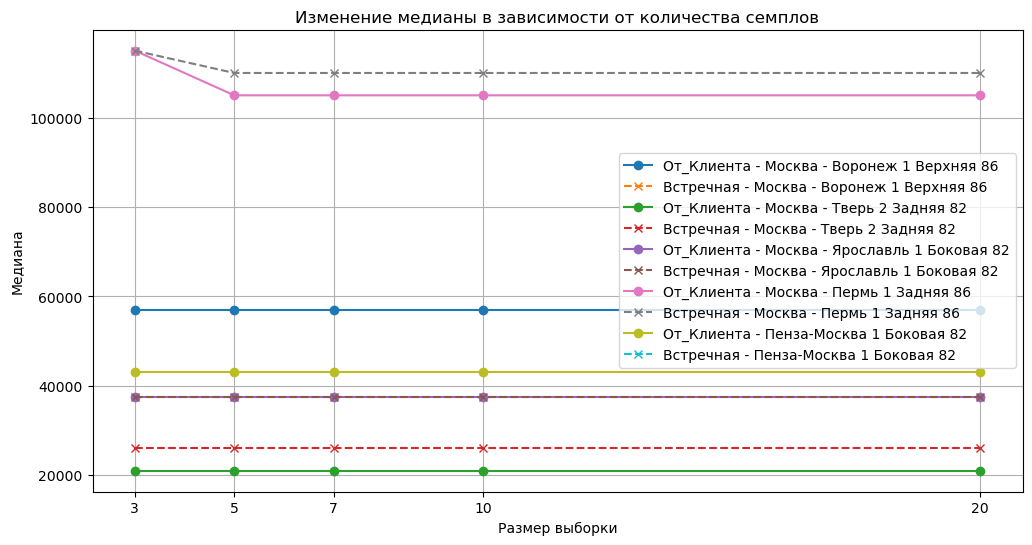

In [6]:
def create_samples(df, sample_sizes):
    samples = {}
    for size in sample_sizes:
        sample = df.groupby('direction').head(size).reset_index(drop=True)
        samples[size] = sample.reset_index(drop=True)
    return samples

sample_sizes = [3, 5, 7, 10, 20]

samples = create_samples(df, sample_sizes)

def calculate_medians(samples):
    medians = {}
    for size, sample in samples.items():
        median_values = sample.groupby('direction')[['price_client', 'counter_price']].median()
        medians[size] = median_values
    return medians

medians = calculate_medians(samples)

random_directions = np.random.choice(df['direction'].unique(), 5, replace=False)

median_data = {size: medians[size].loc[random_directions] for size in sample_sizes}

plt.figure(figsize=(12, 6))
for direction in random_directions:
    plt.plot(sample_sizes, [median_data[size].loc[direction, 'price_client'] for size in sample_sizes], marker='o', label=f'От_Клиента - {direction}')
    plt.plot(sample_sizes, [median_data[size].loc[direction, 'counter_price'] for size in sample_sizes], marker='x', linestyle='--', label=f'Встречная - {direction}')

plt.title('Изменение медианы в зависимости от количества семплов')
plt.xlabel('Размер выборки')
plt.ylabel('Медиана')
plt.xticks(sample_sizes)
plt.legend()
plt.grid()
plt.show()

In [7]:
results = pd.DataFrame({'Направления': medians[sample_sizes[0]].index})

for size in sample_sizes:
    results[f'med_pr_cl_{size}'] = medians[size]['price_client'].values
    results[f'med_pr_co_{size}'] = medians[size]['counter_price'].values

results

,Направления,med_pr_cl_3,med_pr_co_3,med_pr_cl_5,med_pr_co_5,med_pr_cl_7,med_pr_co_7,med_pr_cl_10,med_pr_co_10,med_pr_cl_20,med_pr_co_20
0,Архангельск-Москва 1 Задняя 82,65000.0,67000.0,67000.0,70000.0,67000.0,70000.0,67000.0,70000.0,67000.0,70000.0
1,Архангельск-Москва 1 Задняя 86,NaN,75000.0,NaN,75000.0,NaN,75000.0,NaN,75000.0,NaN,75000.0
2,Архангельск-Москва 2 Задняя 82,70000.0,70000.0,70000.0,70000.0,75500.0,70000.0,76000.0,67000.0,76000.0,67000.0
3,Астрахань-Москва 1 Задняя 82,60000.0,NaN,60000.0,NaN,60000.0,NaN,60000.0,NaN,60000.0,NaN
4,Астрахань-Москва 2 Задняя 82,58000.0,NaN,55000.0,NaN,55000.0,NaN,55000.0,NaN,55000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
542,Челябинск-Москва 2 Задняя 82,68000.0,70000.0,63000.0,70000.0,63000.0,70000.0,63000.0,72500.0,63000.0,72500.0
543,Ярославль-Москва 1 Боковая 90,25000.0,NaN,25000.0,NaN,25000.0,NaN,25000.0,NaN,25000.0,NaN
544,Ярославль-Москва 1 Задняя 82,17500.0,24500.0,17500.0,23500.0,19500.0,23500.0,20000.0,23500.0,20000.0,23500.0
545,Ярославль-Москва 2 Задняя 82,23000.0,NaN,24000.0,25000.0,24000.0,25000.0,24000.0,25000.0,24000.0,25000.0


In [8]:
results['A_div_I'] = results['med_pr_cl_3'] / results['med_pr_cl_20']
results['B_div_I'] = results['med_pr_cl_5'] / results['med_pr_cl_20']
results['C_div_I'] = results['med_pr_cl_7'] / results['med_pr_cl_20']
results['D_div_I'] = results['med_pr_cl_10'] / results['med_pr_cl_20']
results['E_div_T'] = results['med_pr_co_3'] / results['med_pr_co_20']
results['F_div_T'] = results['med_pr_co_5'] / results['med_pr_co_20']
results['G_div_T'] = results['med_pr_co_7'] / results['med_pr_co_20']
results['H_div_T'] = results['med_pr_co_10'] / results['med_pr_co_20']

results

,Направления,med_pr_cl_3,med_pr_co_3,med_pr_cl_5,med_pr_co_5,med_pr_cl_7,med_pr_co_7,med_pr_cl_10,med_pr_co_10,med_pr_cl_20,med_pr_co_20,A_div_I,B_div_I,C_div_I,D_div_I,E_div_T,F_div_T,G_div_T,H_div_T
0,Архангельск-Москва 1 Задняя 82,65000.0,67000.0,67000.0,70000.0,67000.0,70000.0,67000.0,70000.0,67000.0,70000.0,0.970149,1.000000,1.000000,1.0,0.957143,1.000000,1.000000,1.0
1,Архангельск-Москва 1 Задняя 86,NaN,75000.0,NaN,75000.0,NaN,75000.0,NaN,75000.0,NaN,75000.0,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
2,Архангельск-Москва 2 Задняя 82,70000.0,70000.0,70000.0,70000.0,75500.0,70000.0,76000.0,67000.0,76000.0,67000.0,0.921053,0.921053,0.993421,1.0,1.044776,1.044776,1.044776,1.0
3,Астрахань-Москва 1 Задняя 82,60000.0,NaN,60000.0,NaN,60000.0,NaN,60000.0,NaN,60000.0,NaN,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
4,Астрахань-Москва 2 Задняя 82,58000.0,NaN,55000.0,NaN,55000.0,NaN,55000.0,NaN,55000.0,NaN,1.054545,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Челябинск-Москва 2 Задняя 82,68000.0,70000.0,63000.0,70000.0,63000.0,70000.0,63000.0,72500.0,63000.0,72500.0,1.079365,1.000000,1.000000,1.0,0.965517,0.965517,0.965517,1.0
543,Ярославль-Москва 1 Боковая 90,25000.0,NaN,25000.0,NaN,25000.0,NaN,25000.0,NaN,25000.0,NaN,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
544,Ярославль-Москва 1 Задняя 82,17500.0,24500.0,17500.0,23500.0,19500.0,23500.0,20000.0,23500.0,20000.0,23500.0,0.875000,0.875000,0.975000,1.0,1.042553,1.000000,1.000000,1.0
545,Ярославль-Москва 2 Задняя 82,23000.0,NaN,24000.0,25000.0,24000.0,25000.0,24000.0,25000.0,24000.0,25000.0,0.958333,1.000000,1.000000,1.0,NaN,1.000000,1.000000,1.0


In [9]:
result2 = results[['Направления', 'A_div_I', 'B_div_I', 'C_div_I', 'D_div_I', 'E_div_T', 'F_div_T', 'G_div_T', 'H_div_T']]
result2

,Направления,A_div_I,B_div_I,C_div_I,D_div_I,E_div_T,F_div_T,G_div_T,H_div_T
0,Архангельск-Москва 1 Задняя 82,0.970149,1.000000,1.000000,1.0,0.957143,1.000000,1.000000,1.0
1,Архангельск-Москва 1 Задняя 86,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
2,Архангельск-Москва 2 Задняя 82,0.921053,0.921053,0.993421,1.0,1.044776,1.044776,1.044776,1.0
3,Астрахань-Москва 1 Задняя 82,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
4,Астрахань-Москва 2 Задняя 82,1.054545,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
542,Челябинск-Москва 2 Задняя 82,1.079365,1.000000,1.000000,1.0,0.965517,0.965517,0.965517,1.0
543,Ярославль-Москва 1 Боковая 90,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
544,Ярославль-Москва 1 Задняя 82,0.875000,0.875000,0.975000,1.0,1.042553,1.000000,1.000000,1.0
545,Ярославль-Москва 2 Задняя 82,0.958333,1.000000,1.000000,1.0,NaN,1.000000,1.000000,1.0


In [10]:
result2 = result2.rename(columns={'A_div_I' : 'cl_med3/cl_med20', 'B_div_I' : 'cl_med5/cl_med20', 'C_div_I' : 'cl_med7/cl_med20',
                        'D_div_I' : 'cl_med10/cl_med20', 'E_div_T' : 'co_med3/co_med20', 'F_div_T' : 'co_med5/co_med20',
                        'G_div_T' : 'co_med7/co_med20', 'H_div_T' : 'co_med10/co_med20'
                       })
result2

,Направления,cl_med3/cl_med20,cl_med5/cl_med20,cl_med7/cl_med20,cl_med10/cl_med20,co_med3/co_med20,co_med5/co_med20,co_med7/co_med20,co_med10/co_med20
0,Архангельск-Москва 1 Задняя 82,0.970149,1.000000,1.000000,1.0,0.957143,1.000000,1.000000,1.0
1,Архангельск-Москва 1 Задняя 86,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
2,Архангельск-Москва 2 Задняя 82,0.921053,0.921053,0.993421,1.0,1.044776,1.044776,1.044776,1.0
3,Астрахань-Москва 1 Задняя 82,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
4,Астрахань-Москва 2 Задняя 82,1.054545,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
542,Челябинск-Москва 2 Задняя 82,1.079365,1.000000,1.000000,1.0,0.965517,0.965517,0.965517,1.0
543,Ярославль-Москва 1 Боковая 90,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
544,Ярославль-Москва 1 Задняя 82,0.875000,0.875000,0.975000,1.0,1.042553,1.000000,1.000000,1.0
545,Ярославль-Москва 2 Задняя 82,0.958333,1.000000,1.000000,1.0,NaN,1.000000,1.000000,1.0


In [11]:
result2.sort_values(['cl_med3/cl_med20', 'cl_med5/cl_med20', 'cl_med7/cl_med20', 'cl_med10/cl_med20',
                     'co_med3/co_med20', 'co_med5/co_med20', 'co_med7/co_med20', 'co_med10/co_med20'],
                   ascending=[False,False,False,False,False,False,False,False])

,Направления,cl_med3/cl_med20,cl_med5/cl_med20,cl_med7/cl_med20,cl_med10/cl_med20,co_med3/co_med20,co_med5/co_med20,co_med7/co_med20,co_med10/co_med20
87,Краснодар-Москва 2 Задняя 82,1.276190,1.180952,1.142857,1.0,0.891566,1.048193,1.048193,1.0
462,Пятигорск-Москва 1 Задняя 82,1.235294,1.000000,1.000000,1.0,1.071429,1.607143,1.035714,1.0
473,Рязань-Москва 1 Задняя 82,1.224806,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
526,Тюмень-Москва 1 Верхняя 82,1.207630,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0
457,Пермь-Москва 1 Задняя 82,1.181818,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
474,Рязань-Москва 1 Задняя 90,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
485,Саранск-Москва 1 Задняя 82,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
500,Ставрополь-Москва 1 Задняя 86,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
511,Тамбов-Москва 1 Верхняя 90,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0


In [12]:
result2.sort_values(['cl_med3/cl_med20', 'cl_med5/cl_med20', 'cl_med7/cl_med20', 'cl_med10/cl_med20'],
                   ascending=[True,True,True,True])

,Направления,cl_med3/cl_med20,cl_med5/cl_med20,cl_med7/cl_med20,cl_med10/cl_med20,co_med3/co_med20,co_med5/co_med20,co_med7/co_med20,co_med10/co_med20
313,Москва - Рязань 2 Задняя 82,0.700000,0.880000,0.880000,1.0,NaN,NaN,NaN,NaN
147,Москва - Вологда 1 Задняя 82,0.805970,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0
459,Петрозаводск-Москва 1 Боковая 82,0.813397,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0
82,Киров-Москва 2 Задняя 82,0.818182,0.827273,1.000000,1.0,0.782609,0.782609,0.782609,1.0
441,Омск-Москва 1 Задняя 82,0.826087,0.826087,0.945652,1.0,0.936387,0.895674,0.972010,1.0
...,...,...,...,...,...,...,...,...,...
474,Рязань-Москва 1 Задняя 90,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
485,Саранск-Москва 1 Задняя 82,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
500,Ставрополь-Москва 1 Задняя 86,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0
511,Тамбов-Москва 1 Верхняя 90,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0


In [13]:
result2.sort_values(['co_med3/co_med20', 'co_med5/co_med20', 'co_med7/co_med20', 'co_med10/co_med20'],
                   ascending=[False,False,False,False])

,Направления,cl_med3/cl_med20,cl_med5/cl_med20,cl_med7/cl_med20,cl_med10/cl_med20,co_med3/co_med20,co_med5/co_med20,co_med7/co_med20,co_med10/co_med20
39,Воронеж-Москва 2 Задняя 82,0.940000,0.980000,0.98,1.0,2.241379,2.241379,1.0,1.0
536,Уфа-Москва 1 Задняя 82,NaN,0.885000,1.00,1.0,1.274510,1.176471,1.0,1.0
427,Набережные Челны-Москва 1 Задняя 82,0.947368,0.947368,1.00,1.0,1.250000,1.000000,1.0,1.0
518,Тверь-Москва 1 Задняя 82,1.100000,1.000000,1.00,1.0,1.200000,1.028571,1.0,1.0
496,Смоленск-Москва 1 Задняя 82,1.025641,1.000000,1.00,1.0,1.189189,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...
527,Тюмень-Москва 1 Верхняя 90,1.000000,1.000000,1.00,1.0,NaN,NaN,NaN,NaN
528,Тюмень-Москва 1 Задняя 82,1.000000,1.000000,1.00,1.0,NaN,NaN,NaN,NaN
538,Челябинск-Москва 1 Верхняя 82,1.000000,1.000000,1.00,1.0,NaN,NaN,NaN,NaN
543,Ярославль-Москва 1 Боковая 90,1.000000,1.000000,1.00,1.0,NaN,NaN,NaN,NaN


In [14]:
cl_min = []
co_min = []
for index, row in result2.iterrows():
    item = np.min([row['cl_med3/cl_med20'], row['cl_med5/cl_med20'], row['cl_med7/cl_med20'], row['cl_med10/cl_med20']])
    item2= np.min([row['co_med3/co_med20'], row['co_med5/co_med20'], row['co_med7/co_med20'], row['co_med10/co_med20']])
    cl_min.append(item)
    co_min.append(item2)

result2['cl_min'] = cl_min
result2['co_min'] = co_min

In [15]:
result2.sort_values(['cl_min'],ascending=[False])

,Направления,cl_med3/cl_med20,cl_med5/cl_med20,cl_med7/cl_med20,cl_med10/cl_med20,co_med3/co_med20,co_med5/co_med20,co_med7/co_med20,co_med10/co_med20,cl_min,co_min
271,Москва - Омск 2 Задняя 86,1.0,1.000,1.0,1.0,1.00000,1.000000,1.0,1.0,1.0,1.0
358,Москва - Сочи 1 Задняя 90,1.0,1.000,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
356,Москва - Сочи 1 Верхняя 86,1.0,1.000,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
355,Москва - Сочи 1 Верхняя 82,1.0,1.000,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
354,Москва - Смоленск 2 Задняя 90,1.0,1.000,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
485,Саранск-Москва 1 Задняя 82,NaN,NaN,NaN,NaN,1.00000,1.000000,1.0,1.0,NaN,1.0
500,Ставрополь-Москва 1 Задняя 86,NaN,NaN,NaN,NaN,1.00000,1.000000,1.0,1.0,NaN,1.0
511,Тамбов-Москва 1 Верхняя 90,NaN,NaN,NaN,NaN,1.00000,1.000000,1.0,1.0,NaN,1.0
525,Тула-Москва 2 Задняя 92,NaN,NaN,NaN,NaN,1.00000,1.000000,1.0,1.0,NaN,1.0


In [16]:
cl_max = []
co_max = []
for index, row in result2.iterrows():
    item3 = np.max([row['cl_med3/cl_med20'], row['cl_med5/cl_med20'], row['cl_med7/cl_med20'], row['cl_med10/cl_med20']]) - 1
    item4 = np.max([row['co_med3/co_med20'], row['co_med5/co_med20'], row['co_med7/co_med20'], row['co_med10/co_med20']]) - 1
    cl_max.append(item3)
    co_max.append(item4)

result2['cl_max'] = cl_max
result2['co_max'] = co_max

In [17]:
result2.sort_values(['cl_max'],ascending=[False])

,Направления,cl_med3/cl_med20,cl_med5/cl_med20,cl_med7/cl_med20,cl_med10/cl_med20,co_med3/co_med20,co_med5/co_med20,co_med7/co_med20,co_med10/co_med20,cl_min,co_min,cl_max,co_max
87,Краснодар-Москва 2 Задняя 82,1.276190,1.180952,1.142857,1.0,0.891566,1.048193,1.048193,1.0,1.0,0.891566,0.276190,0.048193
462,Пятигорск-Москва 1 Задняя 82,1.235294,1.000000,1.000000,1.0,1.071429,1.607143,1.035714,1.0,1.0,1.000000,0.235294,0.607143
473,Рязань-Москва 1 Задняя 82,1.224806,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.224806,NaN
526,Тюмень-Москва 1 Верхняя 82,1.207630,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.207630,0.000000
457,Пермь-Москва 1 Задняя 82,1.181818,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.181818,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Саранск-Москва 1 Задняя 82,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,NaN,1.000000,NaN,0.000000
500,Ставрополь-Москва 1 Задняя 86,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,NaN,1.000000,NaN,0.000000
511,Тамбов-Москва 1 Верхняя 90,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,NaN,1.000000,NaN,0.000000
525,Тула-Москва 2 Задняя 92,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,NaN,1.000000,NaN,0.000000


In [18]:
result3 = result2[['Направления', 'cl_min', 'cl_max', 'co_min', 'co_max']]
result3

,Направления,cl_min,cl_max,co_min,co_max
0,Архангельск-Москва 1 Задняя 82,0.970149,0.000000,0.957143,0.000000
1,Архангельск-Москва 1 Задняя 86,NaN,NaN,1.000000,0.000000
2,Архангельск-Москва 2 Задняя 82,0.921053,0.000000,1.000000,0.044776
3,Астрахань-Москва 1 Задняя 82,1.000000,0.000000,NaN,NaN
4,Астрахань-Москва 2 Задняя 82,1.000000,0.054545,NaN,NaN
...,...,...,...,...,...
542,Челябинск-Москва 2 Задняя 82,1.000000,0.079365,0.965517,0.000000
543,Ярославль-Москва 1 Боковая 90,1.000000,0.000000,NaN,NaN
544,Ярославль-Москва 1 Задняя 82,0.875000,0.000000,1.000000,0.042553
545,Ярославль-Москва 2 Задняя 82,0.958333,0.000000,NaN,NaN


In [19]:
final = []

for index, row in result3.iterrows():
    if (row['cl_min'] >= row['cl_max']) and (row['co_min'] >= row['co_max']):
        final.append(row)

final_df = pd.DataFrame(final)
final_df

,Направления,cl_min,cl_max,co_min,co_max
0,Архангельск-Москва 1 Задняя 82,0.970149,0.000000,0.957143,0.000000
2,Архангельск-Москва 2 Задняя 82,0.921053,0.000000,1.000000,0.044776
6,Барнаул-Москва 1 Задняя 86,1.000000,0.000000,1.000000,0.000000
8,Барнаул-Москва 2 Задняя 86,1.000000,0.000000,1.000000,0.000000
10,Брянск-Москва 1 Верхняя 82,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
539,Челябинск-Москва 1 Верхняя 92,1.000000,0.000000,1.000000,0.000000
540,Челябинск-Москва 1 Задняя 82,1.000000,0.111111,1.000000,0.062500
541,Челябинск-Москва 1 Задняя 86,1.000000,0.000000,1.000000,0.000000
542,Челябинск-Москва 2 Задняя 82,1.000000,0.079365,0.965517,0.000000


In [20]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Направления  547 non-null    object 
 1   cl_min       530 non-null    float64
 2   cl_max       530 non-null    float64
 3   co_min       245 non-null    float64
 4   co_max       245 non-null    float64
dtypes: float64(4), object(1)
memory usage: 21.5+ KB


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 0 to 544
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Направления  227 non-null    object 
 1   cl_min       227 non-null    float64
 2   cl_max       227 non-null    float64
 3   co_min       227 non-null    float64
 4   co_max       227 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.6+ KB


In [22]:
result3.isnull().sum()

Направления      0
cl_min          17
cl_max          17
co_min         302
co_max         302
dtype: int64

In [23]:
final_cl_dif = []

for index, row in result3.iterrows():
    if (row['cl_min'] >= row['cl_max']):
        final_cl_dif.append(row)

final_cl = pd.DataFrame(final_cl_dif)
final_cl

,Направления,cl_min,cl_max,co_min,co_max
0,Архангельск-Москва 1 Задняя 82,0.970149,0.000000,0.957143,0.000000
2,Архангельск-Москва 2 Задняя 82,0.921053,0.000000,1.000000,0.044776
3,Астрахань-Москва 1 Задняя 82,1.000000,0.000000,NaN,NaN
4,Астрахань-Москва 2 Задняя 82,1.000000,0.054545,NaN,NaN
5,Барнаул-Москва 1 Задняя 82,0.961165,0.000000,NaN,NaN
...,...,...,...,...,...
542,Челябинск-Москва 2 Задняя 82,1.000000,0.079365,0.965517,0.000000
543,Ярославль-Москва 1 Боковая 90,1.000000,0.000000,NaN,NaN
544,Ярославль-Москва 1 Задняя 82,0.875000,0.000000,1.000000,0.042553
545,Ярославль-Москва 2 Задняя 82,0.958333,0.000000,NaN,NaN


In [24]:
final_co_dif = []

for index, row in result3.iterrows():
    if (row['co_min'] >= row['co_max']):
        final_co_dif.append(row)

final_co = pd.DataFrame(final_co_dif)
final_co

,Направления,cl_min,cl_max,co_min,co_max
0,Архангельск-Москва 1 Задняя 82,0.970149,0.000000,0.957143,0.000000
1,Архангельск-Москва 1 Задняя 86,NaN,NaN,1.000000,0.000000
2,Архангельск-Москва 2 Задняя 82,0.921053,0.000000,1.000000,0.044776
6,Барнаул-Москва 1 Задняя 86,1.000000,0.000000,1.000000,0.000000
8,Барнаул-Москва 2 Задняя 86,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
539,Челябинск-Москва 1 Верхняя 92,1.000000,0.000000,1.000000,0.000000
540,Челябинск-Москва 1 Задняя 82,1.000000,0.111111,1.000000,0.062500
541,Челябинск-Москва 1 Задняя 86,1.000000,0.000000,1.000000,0.000000
542,Челябинск-Москва 2 Задняя 82,1.000000,0.079365,0.965517,0.000000


In [25]:
result3.head()

,Направления,cl_min,cl_max,co_min,co_max
0,Архангельск-Москва 1 Задняя 82,0.970149,0.000000,0.957143,0.000000
1,Архангельск-Москва 1 Задняя 86,NaN,NaN,1.000000,0.000000
2,Архангельск-Москва 2 Задняя 82,0.921053,0.000000,1.000000,0.044776
3,Астрахань-Москва 1 Задняя 82,1.000000,0.000000,NaN,NaN
4,Астрахань-Москва 2 Задняя 82,1.000000,0.054545,NaN,NaN
